In [8]:
import os
os.chdir('../OneDrive/Desktop/Data Mining II/Soccer-Scouting')

In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'LICENSE',
 'player_data_final.csv',
 'README.md',
 'Recommender.ipynb',
 'Web_Scraper.ipynb']

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
sns.set(style="white")

In [77]:
df = pd.read_csv('player_data_final.csv')

In [78]:
df.columns

Index(['Name', 'Age', 'OVA', 'POT', 'Team & Contract', 'ID', 'Height',
       'Weight', 'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total', 'Base Stats',
       'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY'],
      dtype='object')

In [79]:
df.Wage

0          €3K
1           €0
2         €10K
3         €51K
4         €31K
         ...  
20095     €45K
20096    €145K
20097     €11K
20098    €230K
20099     €37K
Name: Wage, Length: 20100, dtype: object

In [80]:
df= df[df.OVA >70]

In [81]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.drop_duplicates('Name',inplace=True)

In [82]:
df.head()

,Name,Age,OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,G. Buffon GK,43,80,80,Parma 2021 ~ 2023,1179,192cm,92kg,Right,80,...,1,Medium,Medium,4,76,73,70,76,34,90
1,18 Kaká CAM CF,35,80,80,Brazil Free,138449,186cm,83kg,Right,78,...,4,High,Medium,3,62,76,79,78,30,58
2,Yeremy Pino RM LM ST,18,75,87,Villarreal CF 2020 ~ 2027,259377,172cm,60kg,Right,76,...,3,High,Low,1,76,68,72,76,31,50
3,Pedri CM,18,81,91,FC Barcelona 2020 ~ 2026,251854,174cm,61kg,Right,83,...,4,High,High,2,78,65,79,84,66,63
4,C. Kelleher GK,22,71,79,Liverpool 2017 ~ 2022,240913,188cm,74kg,Right,71,...,1,Medium,Medium,1,71,69,73,73,41,68


In [83]:
df = df.fillna(df.mean())

In [84]:
df['Value']=df['Value'].map(lambda x: x.lstrip('€').rstrip('KM')).astype('float64')

In [85]:
df['Height']=df['Height'].map(lambda x:x.rstrip('cm')).astype('float64')

In [86]:
df['Weight']=df['Weight'].map(lambda x: x.rstrip('kg')).astype('float64')

In [87]:
df['foot']=df['foot'].astype('category')

In [88]:
df['BP'] = df['BP'].astype('category')

In [89]:
df['Joined']=df['Joined'].astype('datetime64')

In [90]:
df['Wage']=df['Wage'].map(lambda x: x.lstrip('€').rstrip('K')).astype('float64')

In [91]:
df['Release Clause']=df['Release Clause'].map(lambda x: x.lstrip('€').rstrip('KM')).astype('float64')

In [92]:
df['A/W'] =df['A/W'].astype('category')

In [93]:
df['D/W'] =df['D/W'].astype('category')

In [94]:
df['foot'] = df['foot'].cat.codes
df['BP'] = df['BP'].cat.codes
df['A/W'] = df['A/W'].cat.codes
df['D/W'] = df['D/W'].cat.codes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 3590
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              3355 non-null   object        
 1   Age               3355 non-null   int64         
 2   OVA               3355 non-null   int64         
 3   POT               3355 non-null   int64         
 4   Team & Contract   3355 non-null   object        
 5   ID                3355 non-null   int64         
 6   Height            3355 non-null   float64       
 7   Weight            3355 non-null   float64       
 8   foot              3355 non-null   int8          
 9   BOV               3355 non-null   int64         
 10  BP                3355 non-null   int8          
 11  Growth            3355 non-null   int64         
 12  Joined            3336 non-null   datetime64[ns]
 13  Loan Date End     310 non-null    object        
 14  Value             3355 n

In [63]:
df[['PAC','SHO','PAS','DRI','DEF','PHY']]

,PAC,SHO,PAS,DRI,DEF,PHY
0,76,73,70,76,34,90
1,62,76,79,78,30,58
2,76,68,72,76,31,50
3,78,65,79,84,66,63
4,71,69,73,73,41,68
...,...,...,...,...,...,...
3551,57,53,55,56,72,77
3552,82,76,62,73,41,51
3553,85,69,69,70,57,65
3554,75,65,71,73,43,55


In [95]:
names = df.Name
remove_cols = ['Name','Team & Contract','Loan Date End','Joined','ID','Wage','Release Clause']
df_drop = df.drop(remove_cols,axis=1)
x = df[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping', 'A/W','D/W','IR','PAC','SHO','PAS','DRI','DEF','PHY']]#df_drop.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [96]:
pca= PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(X_norm))

In [97]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [98]:
reduced['cluster'] = clusters
reduced['name'] = df['Name']
reduced.columns = ['x','y','cluster','name']
reduced.head()

,x,y,cluster,name
0,6.073459,-3.128938,2,G. Buffon GK
1,-1.648855,-2.259951,0,18 Kaká CAM CF
2,-0.542483,-2.315504,0,Yeremy Pino RM LM ST
3,-2.210329,-0.659032,4,Pedri CM
4,6.968515,-3.138244,2,C. Kelleher GK


C:\Users\senay\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


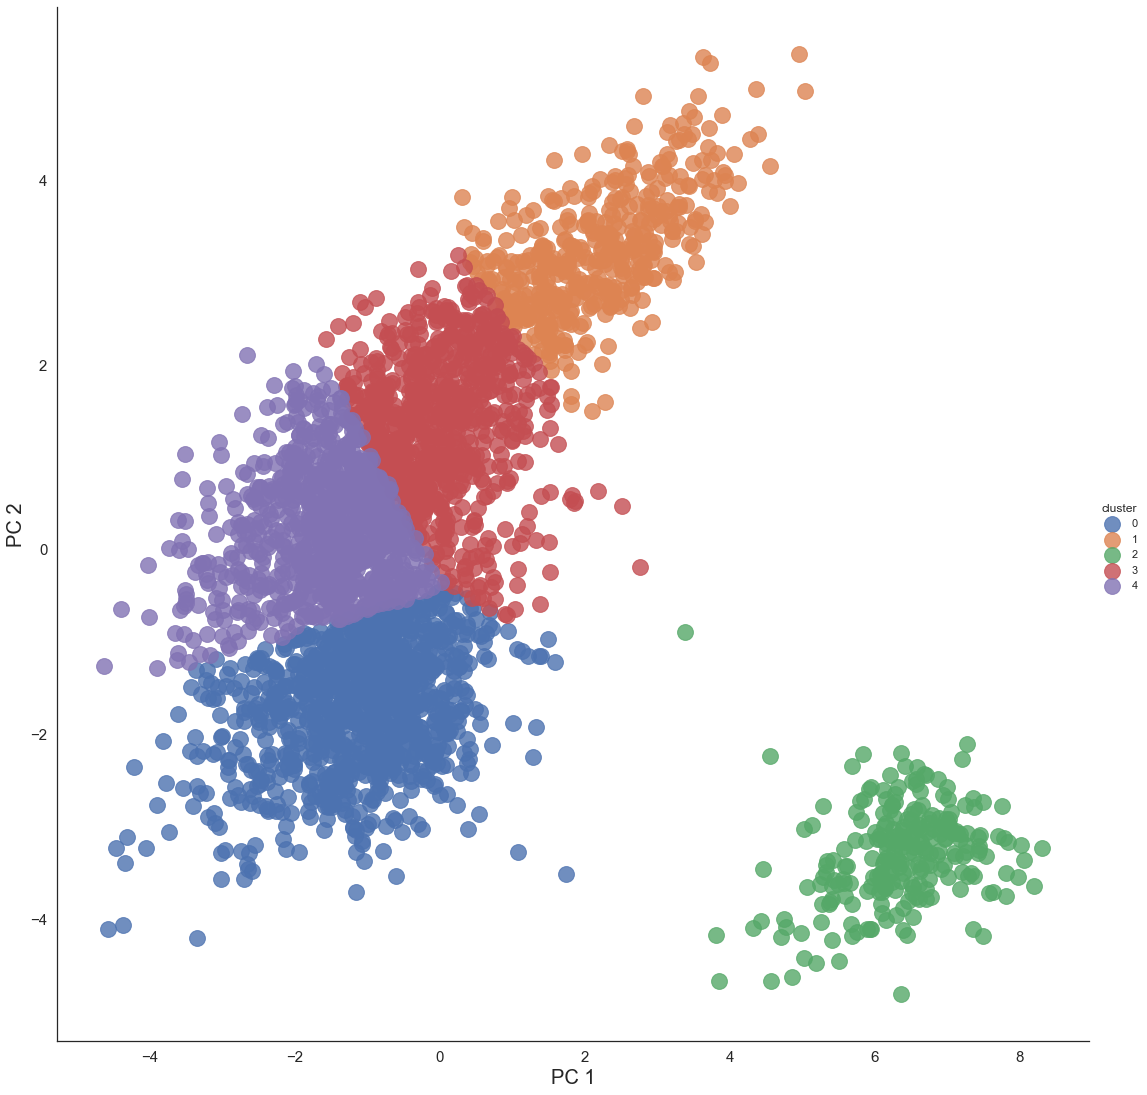

In [102]:
ax = sns.lmplot(x="x",y="y",hue='cluster',data=reduced,legend=True
                ,fit_reg=False,size=15,scatter_kws={'s':250})
texts = []

#for x,y,s in zip(reduced.x,reduced.y,reduced.name):
#    texts.append(plt.text(x,y,s))
#ax.set(ylim=(-2,))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1",fontsize=20)
plt.ylabel("PC 2",fontsize=20)
plt.show()

In [103]:
recommendations = NearestNeighbors(n_neighbors=100,algorithm='auto')
recommendations.fit(reduced.iloc[:,:2].values)

NearestNeighbors(n_neighbors=100)

In [104]:
similarity_indexes = recommendations.kneighbors(reduced.iloc[:,:2].values)[1]

In [105]:
similarity_indexes.shape

(3355, 100)

In [106]:
reduced.shape

(3355, 4)

In [107]:
reduced.head()

,x,y,cluster,name
0,6.073459,-3.128938,2,G. Buffon GK
1,-1.648855,-2.259951,0,18 Kaká CAM CF
2,-0.542483,-2.315504,0,Yeremy Pino RM LM ST
3,-2.210329,-0.659032,4,Pedri CM
4,6.968515,-3.138244,2,C. Kelleher GK


In [108]:
similarity_indexes

array([[   0, 2089,   14, ..., 1685,  608,    6],
       [   1, 1887,  412, ...,   55, 1165,  476],
       [   2, 1612, 1931, ..., 2390, 1647, 1472],
       ...,
       [3352,  754, 2699, ..., 1668, 1276, 1744],
       [3353, 2972, 1214, ..., 2512, 2417, 2381],
       [3354, 3145,   39, ..., 2284, 1713,  222]], dtype=int64)

In [109]:
def recommend(name,size,potential):
    index = df[df['Name']==name].index.tolist()[0]
    most_similar_indexes = similarity_indexes[index]
    if potential:
        return df.iloc[most_similar_indexes[1:],:4].where(df.Age<26).sort_values('POT',ascending=False).iloc[:size]
    else:
        return df.iloc[most_similar_indexes[1:size+1],:4]

In [110]:
recommend(' M. Salah RW',size=20,potential=False)

,Name,Age,OVA,POT
32,Cristiano Ronaldo ST,36,91,91
45,K. Mbappé ST LW,22,91,95
175,P. Dybala CF RW,27,87,87
326,S. Mané LW,29,89,89
133,H. Son LW LM ST,28,89,89
85,R. Lewandowski ST,32,92,92
371,Á. Di María RW LW,33,86,86
71,K. Benzema CF ST,33,91,91
72,Neymar Jr LW CAM,29,91,91
92,M. Depay CF LW CAM,27,86,86


In [111]:
recommend(' M. Salah RW',size=20,potential=True)

,Name,Age,OVA,POT
45,K. Mbappé ST LW,22.0,91.0,95.0
150,P. Foden LW CAM CM,21.0,84.0,92.0
20,Vinícius Jr. LW,20.0,84.0,91.0
27,K. Havertz CAM CF ST,22.0,84.0,91.0
78,João Félix CF ST,21.0,83.0,91.0
34,Ferran Torres RW ST,21.0,82.0,90.0
115,F. Chiesa RW LW RM,23.0,84.0,90.0
138,Oyarzabal LW RW,24.0,85.0,89.0
125,M. Mount CAM RW,22.0,83.0,89.0
44,Antony RW,21.0,82.0,89.0


In [114]:
pd.DataFrame(similarity_indexes).to_csv('similarity_matrix.csv')

In [115]:
similarity_indexes.shape

(3355, 100)

In [116]:
df.to_csv('player_data_final.csv')